In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace = True)
df = df.resample('D').sum()

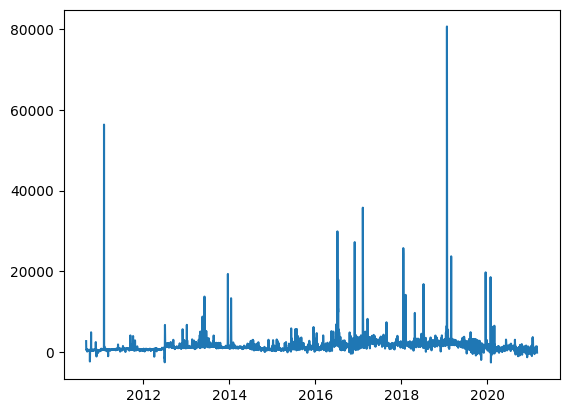

In [2]:
plt.plot(df.index, df.ElecPrice)

## P-value of SysLoad and Gasprice

In [3]:
print(adfuller(df['SysLoad'])[1], adfuller(df['GasPrice'])[1])

0.004253725504574063 0.04502721288462552


## 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set

In [4]:
print(adfuller(df['SysLoad'])[4], adfuller(df['GasPrice'])[4])

{'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499} {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}


## MAPE Function

In [5]:
def mape(y, yhat):
  sm = 0
  for i in range(len(y)):
    sm += (abs((y[i] - yhat[i]) / y[i]))
  sm *= 100
  sm /= (len(y))
  return sm

## Training Prophet Model

In [6]:
df['ds'] = df.index
df.reset_index(drop=True, inplace=True)
df.rename(columns={"ElecPrice": "y"}, inplace = True)
trainset = df[:2757]
testset = df[2757:].reset_index(drop=True)
model = Prophet().fit(trainset)
forecast = model.predict(testset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1jyftp6/a8ju1143.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1jyftp6/07sw7ehn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73235', 'data', 'file=/tmp/tmpf1jyftp6/a8ju1143.json', 'init=/tmp/tmpf1jyftp6/07sw7ehn.json', 'output', 'file=/tmp/tmpf1jyftp6/prophet_modelv0qbxe1z/prophet_model-20230730120649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:06:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:06:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


544.0932873825625


## MAPE Value

In [7]:
print(mape( testset['y'].values, forecast['yhat'].values))

544.0932873825625


## RMSE Function

In [8]:
def rmse(y, yhat):
  sm = 0
  for i in range(len(y)):
    sm += (y[i] - yhat[i]) * (y[i] - yhat[i])
  sm /= (len(y))
  return sm ** (0.5)

## RMSE Value

In [9]:
print(rmse(testset['y'].values, forecast['yhat'].values))

3207.4615275657516


## Training model for Q17-19

In [10]:
trainset2 = df[:2757]
testset2 = df[2757:].reset_index(drop = True)
m2 = Prophet()
m2.add_regressor('Tmax', standardize = False)
m2.add_regressor('SysLoad', standardize = False)
m2.add_regressor('GasPrice', standardize = False)
m2.fit(trainset2)
ft = m2.predict(testset2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1jyftp6/27mwfefq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1jyftp6/ubiqg6ft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93513', 'data', 'file=/tmp/tmpf1jyftp6/27mwfefq.json', 'init=/tmp/tmpf1jyftp6/ubiqg6ft.json', 'output', 'file=/tmp/tmpf1jyftp6/prophet_modelvu887i0_/prophet_model-20230730120954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:09:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

## MAPE Value

In [11]:
print(mape(testset['y'].values, ft['yhat'].values))

241.56626973713495


## RMSE Value

In [12]:
print(rmse(testset['y'].values, ft['yhat'].values))

2718.3714800069556


## Training Model for Q20

In [13]:
m3 = Prophet()
m3.add_regressor('SysLoad', standardize = False)
m3.add_regressor('GasPrice', standardize = False)
m3.fit(trainset2)
ft3 = m3.predict(testset2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1jyftp6/78i0wajm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1jyftp6/i213mp8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18705', 'data', 'file=/tmp/tmpf1jyftp6/78i0wajm.json', 'init=/tmp/tmpf1jyftp6/i213mp8k.json', 'output', 'file=/tmp/tmpf1jyftp6/prophet_model21wvna5w/prophet_model-20230730121250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## MAPE Value

In [14]:
print(mape(testset['y'].values, ft3['yhat'].values))

257.8153321184542
